<a href="https://colab.research.google.com/github/soumya527/News-Feedback-System/blob/main/models/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_csv("Random.csv")

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['Headline'] = df['Headline'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Ministry,Headline,Sentiment
0,Ministry of Home Affairs (MHA),citizens state policing impunity rule law indi...,Negative
1,Ministry of Home Affairs (MHA),simplify colonial laws mha asks state dgps sen...,Positive
2,Ministry of Home Affairs (MHA),democracy india chatham house,Neutral
3,Ministry of Home Affairs (MHA),upsc tightens guidelines appointment state dgp...,Positive
4,Ministry of Home Affairs (MHA),press information bureau pib,Neutral


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-10-21015d5db0bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cnt_pro.index, y=cnt_pro.values, palette='Blues_d')


Sentiment
Positive    292
Neutral     232
Negative    141
Name: count, dtype: int64


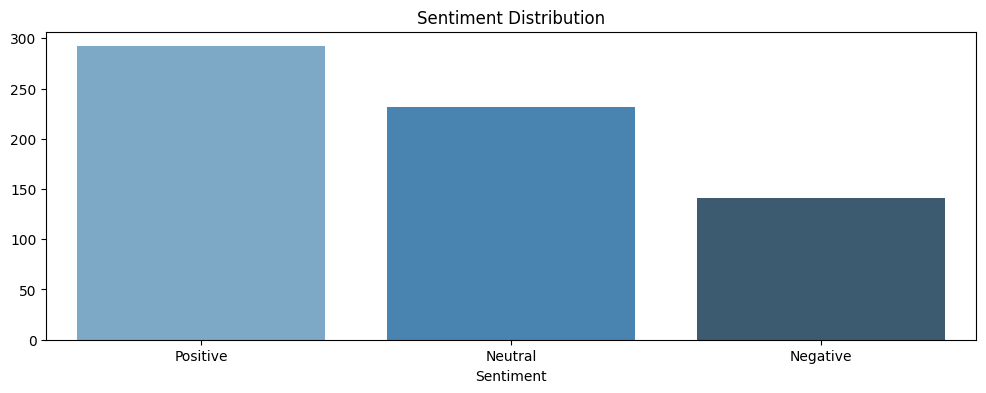

In [ ]:
cnt_pro = df['Sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, palette='Blues_d')
plt.title('Sentiment Distribution')
print(df['Sentiment'].value_counts())

In [ ]:

sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

In [ ]:
X = df['Headline']
y = df['Sentiment']

In [ ]:
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=sentiment_mapping.keys()))

Accuracy: 0.6240601503759399
Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.50      0.64        28
     Neutral       0.61      0.56      0.58        50
    Positive       0.58      0.75      0.65        55

    accuracy                           0.62       133
   macro avg       0.69      0.60      0.62       133
weighted avg       0.65      0.62      0.62       133



In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

y_pred_tuned = grid_search.predict(X_test)
print("Accuracy after tuning:", accuracy_score(y_test, y_pred_tuned))

# Calculate weighted precision, recall, and F1-score
precision = precision_score(y_test, y_pred_tuned, average='weighted')
recall = recall_score(y_test, y_pred_tuned, average='weighted')
f1 = f1_score(y_test, y_pred_tuned, average='weighted')

# Print weighted precision, recall, and F1-score
print("Precision of the best model:", precision)
print("Recall of the best model:", recall)
print("F1-score of the best model:", f1)

# Print overall classification report
print("Classification Report after tuning:")
print(classification_report(y_test, y_pred_tuned, target_names=sentiment_mapping.keys()))




Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.7030153412096631
Accuracy after tuning: 0.631578947368421
Precision of the best model: 0.655080966514378
Recall of the best model: 0.631578947368421
F1-score of the best model: 0.6329885929238103
Classification Report after tuning:
              precision    recall  f1-score   support

    Negative       0.88      0.54      0.67        28
     Neutral       0.58      0.62      0.60        50
    Positive       0.60      0.69      0.64        55

    accuracy                           0.63       133
   macro avg       0.69      0.62      0.64       133
weighted avg       0.66      0.63      0.63       133

